# Pandas教程
by 褚则伟 

## 目录
- Group by
- Aggregate
- Transform

## Group By

In [1]:
import pandas as pd
import numpy as np

举个栗子，假设我们现在有一张公司每个员工的收入流水。

In [3]:
salaries = pd.DataFrame({
    "Name": ['July', "Zewei", 'Zewei', "Han", "July", "July", "Zewei", "July"],
    "Year": [2016, 2016, 2016, 2016, 2017, 2017, 2017, 2017],
    "Salary": [10000, 2000, 4000, 5000, 18000, 25000, 3000, 4000],
    "Bonus": [3000, 1000, 1000, 1200, 4000, 2300, 500, 1000]
})
salaries

,Bonus,Name,Salary,Year
0,3000,July,10000,2016
1,1000,Zewei,2000,2016
2,1000,Zewei,4000,2016
3,1200,Han,5000,2016
4,4000,July,18000,2017
5,2300,July,25000,2017
6,500,Zewei,3000,2017
7,1000,July,4000,2017


接下来我给大家演示一下什么叫做Group By

In [5]:
groupby_name = salaries.groupby("Name")
groupby_name

groupby构造了一个GroupBy object，我们可以对这个object做各种操作

### groupby之后一般要做一些aggregate操作

In [6]:
groupby_name.sum()

,Bonus,Salary,Year
Name,,,
Han,1200,5000,2016
July,10300,57000,8067
Zewei,2500,9000,6049


In [7]:
groupby_name[["Salary", "Bonus"]].sum()

,Salary,Bonus
Name,,
Han,5000,1200
July,57000,10300
Zewei,9000,2500


默认会排序，也可以选择不排序

In [9]:
salaries.groupby("Name", sort=False).sum()

,Bonus,Salary,Year
Name,,,
July,10300,57000,8067
Zewei,2500,9000,6049
Han,1200,5000,2016


也可以这么写

In [12]:
groupby_name.aggregate(np.sum)

,Bonus,Salary,Year
Name,,,
Han,1200,5000,2016
July,10300,57000,8067
Zewei,2500,9000,6049


group by的attributes

In [15]:
salaries

,Bonus,Name,Salary,Year
0,3000,July,10000,2016
1,1000,Zewei,2000,2016
2,1000,Zewei,4000,2016
3,1200,Han,5000,2016
4,4000,July,18000,2017
5,2300,July,25000,2017
6,500,Zewei,3000,2017
7,1000,July,4000,2017


In [14]:
groupby_name.groups

{'Han': Int64Index([3], dtype='int64'),
 'July': Int64Index([0, 4, 5, 7], dtype='int64'),
 'Zewei': Int64Index([1, 2, 6], dtype='int64')}

In [16]:
len(groupby_name)

3

In [17]:
groupby_name_year = salaries.groupby(["Name", "Year"])

In [20]:
groupby_name_year.sum().index

MultiIndex(levels=[['Han', 'July', 'Zewei'], [2016, 2017]],
           labels=[[0, 1, 1, 2, 2], [0, 0, 1, 0, 1]],
           names=['Name', 'Year'])

除了sum之外，我们再来尝试一下size,mean,median 

In [23]:
groupby_name_year.size()

Name   Year
Han    2016    1
July   2016    1
       2017    3
Zewei  2016    2
       2017    1
dtype: int64

In [24]:
groupby_name_year.mean()

Bonus        Salary
Name  Year                           
Han   2016  1200.000000   5000.000000
July  2016  3000.000000  10000.000000
      2017  2433.333333  15666.666667
Zewei 2016  1000.000000   3000.000000
      2017   500.000000   3000.000000

In [25]:
groupby_name_year.median()

Bonus  Salary
Name  Year               
Han   2016   1200    5000
July  2016   3000   10000
      2017   2300   18000
Zewei 2016   1000    3000
      2017    500    3000

In [26]:
groupby_name_year.std()

Bonus        Salary
Name  Year                          
Han   2016         NaN           NaN
July  2016         NaN           NaN
      2017  1504.43788  10692.676622
Zewei 2016     0.00000   1414.213562
      2017         NaN           NaN

describe可以输出各项统计信息

In [27]:
groupby_name_year.describe()

Bonus                                                           \
           count         mean         std     min     25%     50%     75%   
Name  Year                                                                  
Han   2016   1.0  1200.000000         NaN  1200.0  1200.0  1200.0  1200.0   
July  2016   1.0  3000.000000         NaN  3000.0  3000.0  3000.0  3000.0   
      2017   3.0  2433.333333  1504.43788  1000.0  1650.0  2300.0  3150.0   
Zewei 2016   2.0  1000.000000     0.00000  1000.0  1000.0  1000.0  1000.0   
      2017   1.0   500.000000         NaN   500.0   500.0   500.0   500.0   

                   Salary                                                \
               max  count          mean           std      min      25%   
Name  Year                                                                
Han   2016  1200.0    1.0   5000.000000           NaN   5000.0   5000.0   
July  2016  3000.0    1.0  10000.000000           NaN  10000.0  10000.0   
      2017  4000.0    3.0  15666.666667  10692.676622   4000.0  11000.0   
Zewei 2016  1000.0    2.0   3000.000000   1414.213562   2000.0   2500.0   
      2017   500.0    1.0   3000.000000           NaN   3000.0   3000.0   

                                       
                50%      75%      max  
Name  Year                             
Han   2016   5000.0   5000.0   5000.0  
July  2016  10000.0  10000.0  10000.0  
      2017  18000.0  21500.0  25000.0  
Zewei 2016   3000.0   3500.0   4000.0  
      2017   3000.0   3000.0   3000.0

In [31]:
groupby_name_year.max()

Bonus  Salary
Name  Year               
Han   2016   1200    5000
July  2016   3000   10000
      2017   4000   25000
Zewei 2016   1000    4000
      2017    500    3000

In [38]:
groupby_name_year.aggregate([np.mean, np.std, np.sum])

Bonus                          Salary                     
                   mean         std   sum          mean           std    sum
Name  Year                                                                  
Han   2016  1200.000000         NaN  1200   5000.000000           NaN   5000
July  2016  3000.000000         NaN  3000  10000.000000           NaN  10000
      2017  2433.333333  1504.43788  7300  15666.666667  10692.676622  47000
Zewei 2016  1000.000000     0.00000  2000   3000.000000   1414.213562   6000
      2017   500.000000         NaN   500   3000.000000           NaN   3000

### iterate GroupBy object

In [34]:
for name, group in groupby_name:
    print(name)
    print(group)
    print(type(group))

Han
   Bonus Name  Salary  Year
3   1200  Han    5000  2016
<class 'pandas.core.frame.DataFrame'>
July
   Bonus  Name  Salary  Year
0   3000  July   10000  2016
4   4000  July   18000  2017
5   2300  July   25000  2017
7   1000  July    4000  2017
<class 'pandas.core.frame.DataFrame'>
Zewei
   Bonus   Name  Salary  Year
1   1000  Zewei    2000  2016
2   1000  Zewei    4000  2016
6    500  Zewei    3000  2017
<class 'pandas.core.frame.DataFrame'>


选择一个group

In [36]:
groupby_name.get_group("Zewei")
type(groupby_name.get_group("Zewei"))

pandas.core.frame.DataFrame

### transform

In [41]:
nvda = pd.read_csv("data/NVDA.csv", index_col=0, parse_dates=["Date"])
nvda.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,1.750000,1.953125,1.552083,1.640625,1.523430,67867200
1999-01-25,1.770833,1.833333,1.640625,1.812500,1.683028,12762000
1999-01-26,1.833333,1.869792,1.645833,1.671875,1.552448,8580000
1999-01-27,1.677083,1.718750,1.583333,1.666667,1.547611,6109200
1999-01-28,1.666667,1.677083,1.651042,1.661458,1.542776,5688000


In [48]:
nvda.index[0].weekday()

4

In [50]:
key = lambda x: x.year

In [53]:
def key(x):
    return x.year

In [56]:
nvda.groupby(lambda x: x.year).agg([np.mean, np.std]).head()

Open                 High                  Low            \
           mean       std       mean       std       mean       std   
1999   1.950782  0.588882   2.007317  0.614302   1.883559  0.571658   
2000   8.781084  2.999908   9.222697  3.114186   8.360522  2.904761   
2001  13.091254  3.839777  13.600750  3.829838  12.680548  3.830944   
2002   9.690344  6.561287   9.955093  6.664226   9.344391  6.375212   
2003   5.902434  1.461862   6.042659  1.491260   5.764960  1.423422   

          Close            Adj Close                  Volume                
           mean       std       mean       std          mean           std  
1999   1.947230  0.601041   1.808134  0.558107  6.433220e+06  8.142949e+06  
2000   8.778826  3.013104   8.151729  2.797869  1.104182e+07  7.985374e+06  
2001  13.181552  3.833637  12.239956  3.559789  2.782387e+07  1.384318e+07  
2002   9.614749  6.519053   8.927940  6.053379  3.168655e+07  1.558742e+07  
2003   5.900344  1.459852   5.478865  1.355570  2.430220e+07  1.899657e+07

In [57]:
zscore = lambda x: (x - x.mean()) / x.std()

In [59]:
transformed = nvda.groupby(key).transform(zscore)
transformed.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,-0.340955,-0.088217,-0.579850,-0.510124,-0.510124,7.544438
1999-01-25,-0.305578,-0.283222,-0.424964,-0.224161,-0.224161,0.777210
1999-01-26,-0.199444,-0.223871,-0.415854,-0.458130,-0.458131,0.263637
1999-01-27,-0.464778,-0.469747,-0.525185,-0.466795,-0.466798,-0.039791
1999-01-28,-0.482465,-0.537575,-0.406741,-0.475462,-0.475461,-0.091517


In [60]:
%matplotlib inline

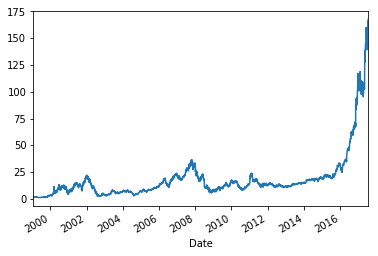

In [62]:
nvda["Adj Close"].plot()

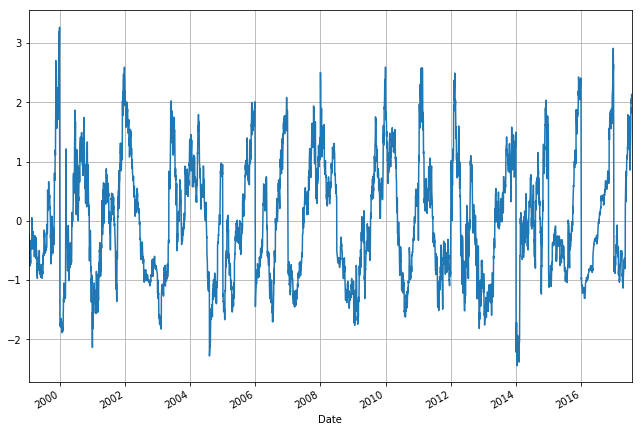

In [66]:
transformed["Adj Close"].plot(grid=True, figsize=(10.8, 7.6))

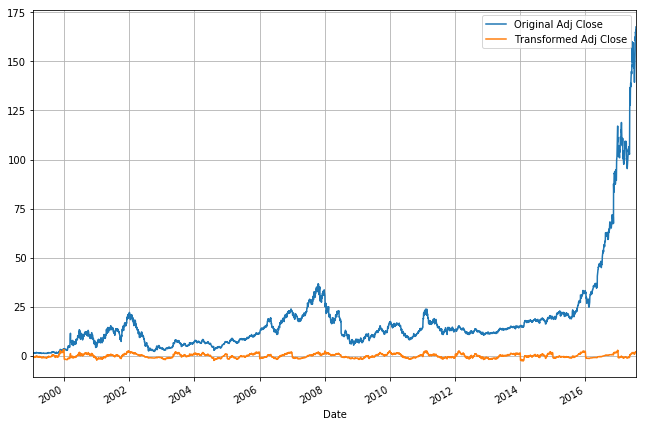

In [67]:
compare = pd.DataFrame({"Original Adj Close": nvda["Adj Close"],
                       "Transformed Adj Close": transformed["Adj Close"]})
compare.plot(grid=True, figsize=(10.8, 7.5))

In [70]:
price_range = lambda x: x.max() - x.min()
nvda.groupby(key).transform(price_range).tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-07-14,70.32,71.290001,69.440003,72.010002,72.110466,87078500.0
2017-07-17,70.32,71.290001,69.440003,72.010002,72.110466,87078500.0
2017-07-18,70.32,71.290001,69.440003,72.010002,72.110466,87078500.0
2017-07-19,70.32,71.290001,69.440003,72.010002,72.110466,87078500.0
2017-07-20,70.32,71.290001,69.440003,72.010002,72.110466,87078500.0


In [72]:
(nvda.groupby(key).transform("max") - nvda.groupby(key).transform("min")).tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-07-14,70.32,71.290001,69.440003,72.010002,72.110466,87078500
2017-07-17,70.32,71.290001,69.440003,72.010002,72.110466,87078500
2017-07-18,70.32,71.290001,69.440003,72.010002,72.110466,87078500
2017-07-19,70.32,71.290001,69.440003,72.010002,72.110466,87078500
2017-07-20,70.32,71.290001,69.440003,72.010002,72.110466,87078500


In [81]:
year_key = lambda x: x.year
month_key = lambda x: x.month
nvda.groupby([year_key, month_key]).agg([np.mean, np.std]).head()

Open                High                 Low               Close  \
            mean       std      mean       std      mean       std      mean   
1999 1  1.726562  0.069546  1.786458  0.116462  1.609375  0.041667  1.672743   
     2  1.701754  0.174838  1.762336  0.176923  1.622533  0.134449  1.686403   
     3  1.746150  0.079054  1.788270  0.068821  1.683424  0.071877  1.728714   
     4  1.610119  0.108682  1.643849  0.105531  1.554563  0.106937  1.591766   
     5  1.500000  0.083282  1.532812  0.091906  1.448698  0.063007  1.488151   

                 Adj Close                  Volume                
             std      mean       std          mean           std  
1999 1  0.075793  1.553254  0.070379  1.785120e+07  2.464689e+07  
     2  0.137005  1.565939  0.127219  4.140253e+06  3.012404e+06  
     3  0.073973  1.605227  0.068689  2.189687e+06  1.183487e+06  
     4  0.107088  1.478061  0.099438  2.103600e+06  1.473442e+06  
     5  0.072472  1.381848  0.067295  3.103140e+06  2.629090e+06

In [83]:
monthly_nvda = nvda.groupby([year_key, month_key]).last()

In [92]:
index = [ str(i[0]) + "-" + str(i[1]) for i in monthly_nvda.index.values ]
index = pd.PeriodIndex(index, freq="M")

In [94]:
monthly_nvda.index = index

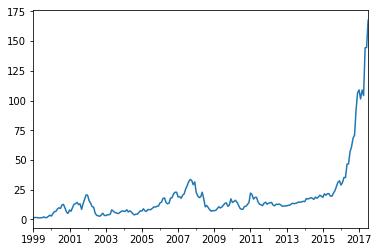

In [95]:
monthly_nvda["Adj Close"].plot()